In [8]:
import pandas as pd

# Define the path to your CSV file
csv_file = "data/jpeg-melanoma-512x512/"

train_df = pd.read_csv(csv_file + 'train.csv')
print(train_df['target'].value_counts())

train_df.head()

0    32542
1      584
Name: target, dtype: int64


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000


In [9]:
# Define the path to your CSV file
csv_file = "data/jpeg-melanoma-512x512/"

train_df = pd.read_csv(csv_file + 'train.csv')
data = train_df.loc[:, ['image_name', 'age_approx', 'anatom_site_general_challenge', 'sex', 'target']]
data['image_name'] = 'data/jpeg-melanoma-512x512/train/' + data['image_name'] + '.jpg'
data

,image_name,age_approx,anatom_site_general_challenge,sex,target
0,data/jpeg-melanoma-512x512/train/ISIC_2637011.jpg,45.0,head/neck,male,0
1,data/jpeg-melanoma-512x512/train/ISIC_0015719.jpg,45.0,upper extremity,female,0
2,data/jpeg-melanoma-512x512/train/ISIC_0052212.jpg,50.0,lower extremity,female,0
3,data/jpeg-melanoma-512x512/train/ISIC_0068279.jpg,45.0,head/neck,female,0
4,data/jpeg-melanoma-512x512/train/ISIC_0074268.jpg,55.0,upper extremity,female,0
...,...,...,...,...,...
33121,data/jpeg-melanoma-512x512/train/ISIC_9999134.jpg,50.0,torso,male,0
33122,data/jpeg-melanoma-512x512/train/ISIC_9999320.jpg,65.0,torso,male,0
33123,data/jpeg-melanoma-512x512/train/ISIC_9999515.jpg,20.0,lower extremity,male,0
33124,data/jpeg-melanoma-512x512/train/ISIC_9999666.jpg,50.0,lower extremity,male,0


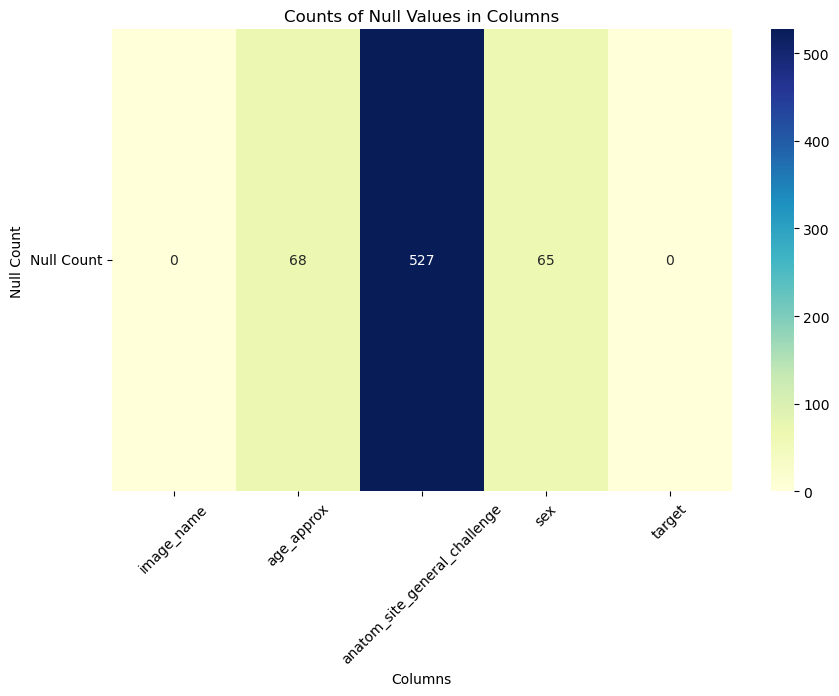

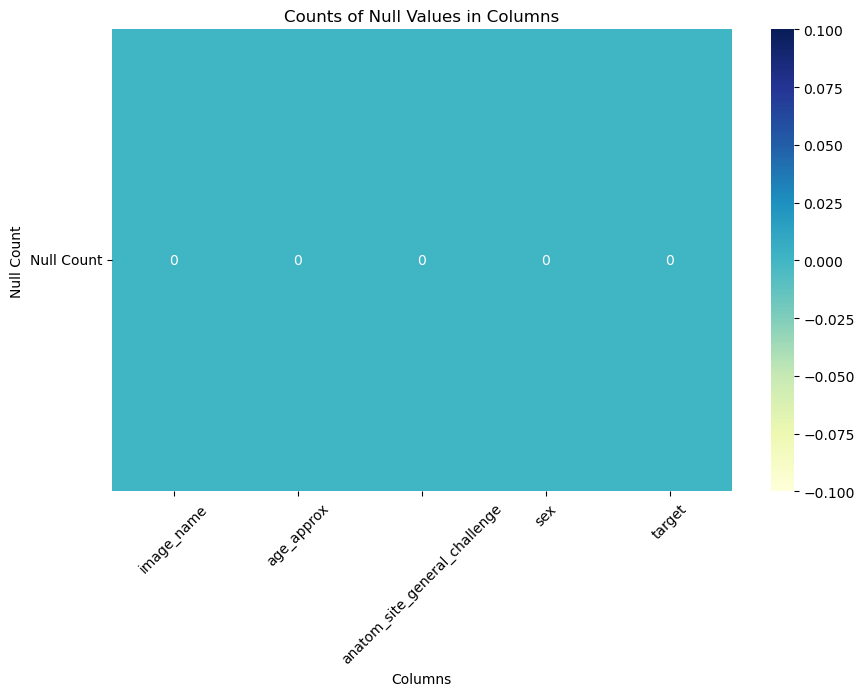

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_null(df):
    # Calculate the counts of null values
    null_counts = df.isna().sum()

    # Convert null_counts to DataFrame for easier manipulation
    null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(null_counts_df.transpose(), annot=True, cmap='YlGnBu', fmt='g')
    plt.title('Counts of Null Values in Columns')
    plt.xlabel('Columns')
    plt.ylabel('Null Count')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
plot_null(data)
combined_data = data.dropna()
plot_null(combined_data)

In [4]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Define mapping dictionaries for sexes and anatom_sites
sexes_mapping = {'male': 0, 'female': 1}

# Define mapping dictionary for anatom_site_general
anatom_site_mapping = {
    'torso': 0,
    'lower extremity': 1,
    'head/neck': 2,
    'upper extremity': 3,
    'palms/soles': 4,
    'oral/genital': 5,
}

# Apply mapping to the dataframe
data['anatom_site_encoded'] = data['anatom_site_general_challenge'].map(anatom_site_mapping)

# Apply mapping to the dataframe
data['sexes_encoded'] = data['sex'].map(sexes_mapping)

data = data.loc[:, ['image_name', 'age_approx', 'anatom_site_encoded', 'sexes_encoded', 'target']]

train_data, test_data = train_test_split(data, test_size=0.3, stratify=data['target'], random_state=123)

# Splitting the test set into validation and test sets (50% validation, 50% test)
valid_data, test_data = train_test_split(test_data, test_size=0.4, stratify=test_data['target'], random_state=123)
# Initialize StandardScaler
scaler = StandardScaler()

# Extract 'age_approx' feature for preprocessing in train_data
age_approx_train = train_data['age_approx'].values.reshape(-1, 1)
ana_approx_train = train_data['anatom_site_encoded'].values.reshape(-1, 1)
sex_approx_train = train_data['sexes_encoded'].values.reshape(-1, 1)

# Fit the scaler to the training data and transform it
age_approx_train_scaled = scaler.fit_transform(age_approx_train)
ana_approx_train_scaled = scaler.fit_transform(ana_approx_train)
sex_approx_train_scaled = scaler.fit_transform(sex_approx_train)

# Apply the fitted scaler to valid_data
age_approx_valid = valid_data['age_approx'].values.reshape(-1, 1)
ana_approx_valid = valid_data['anatom_site_encoded'].values.reshape(-1, 1)
sex_approx_valid = valid_data['sexes_encoded'].values.reshape(-1, 1)
age_approx_valid_scaled = scaler.transform(age_approx_valid)
ana_approx_valid_scaled = scaler.transform(ana_approx_valid)
sex_approx_valid_scaled = scaler.transform(sex_approx_valid)

# Apply the fitted scaler to test_data
age_approx_test = test_data['age_approx'].values.reshape(-1, 1)
ana_approx_test = test_data['anatom_site_encoded'].values.reshape(-1, 1)
sex_approx_test = test_data['sexes_encoded'].values.reshape(-1, 1)
age_approx_test_scaled = scaler.transform(age_approx_test)
ana_approx_test_scaled = scaler.transform(ana_approx_test)
sex_approx_test_scaled = scaler.transform(sex_approx_test)

# Update the 'age_approx' column in the datasets with scaled values
train_data['age_approx'] = age_approx_train_scaled.flatten()
valid_data['age_approx'] = age_approx_valid_scaled.flatten()
test_data['age_approx'] = age_approx_test_scaled.flatten()
train_data['ana_approx'] = ana_approx_train_scaled.flatten()
valid_data['ana_approx'] = ana_approx_valid_scaled.flatten()
test_data['ana_approx'] = ana_approx_test_scaled.flatten()
train_data['sex_approx'] = sex_approx_train_scaled.flatten()
valid_data['sex_approx'] = sex_approx_valid_scaled.flatten()
test_data['sex_approx'] = sex_approx_test_scaled.flatten()

# # Save the scaler object to a file
# scaler_filename = 'age_approx_scaler.joblib'
# dump(scaler, scaler_filename)

# print("Scaler saved to:", scaler_filename)

# Printing the shapes of the resulting datasets
print("Train set shape:", train_data.shape)
print("Validation set shape:", valid_data.shape)
print("Test set shape:", test_data.shape)

Train set shape: (23188, 7)
Validation set shape: (5962, 7)
Test set shape: (3976, 7)


Data loading and preprocessing completed.


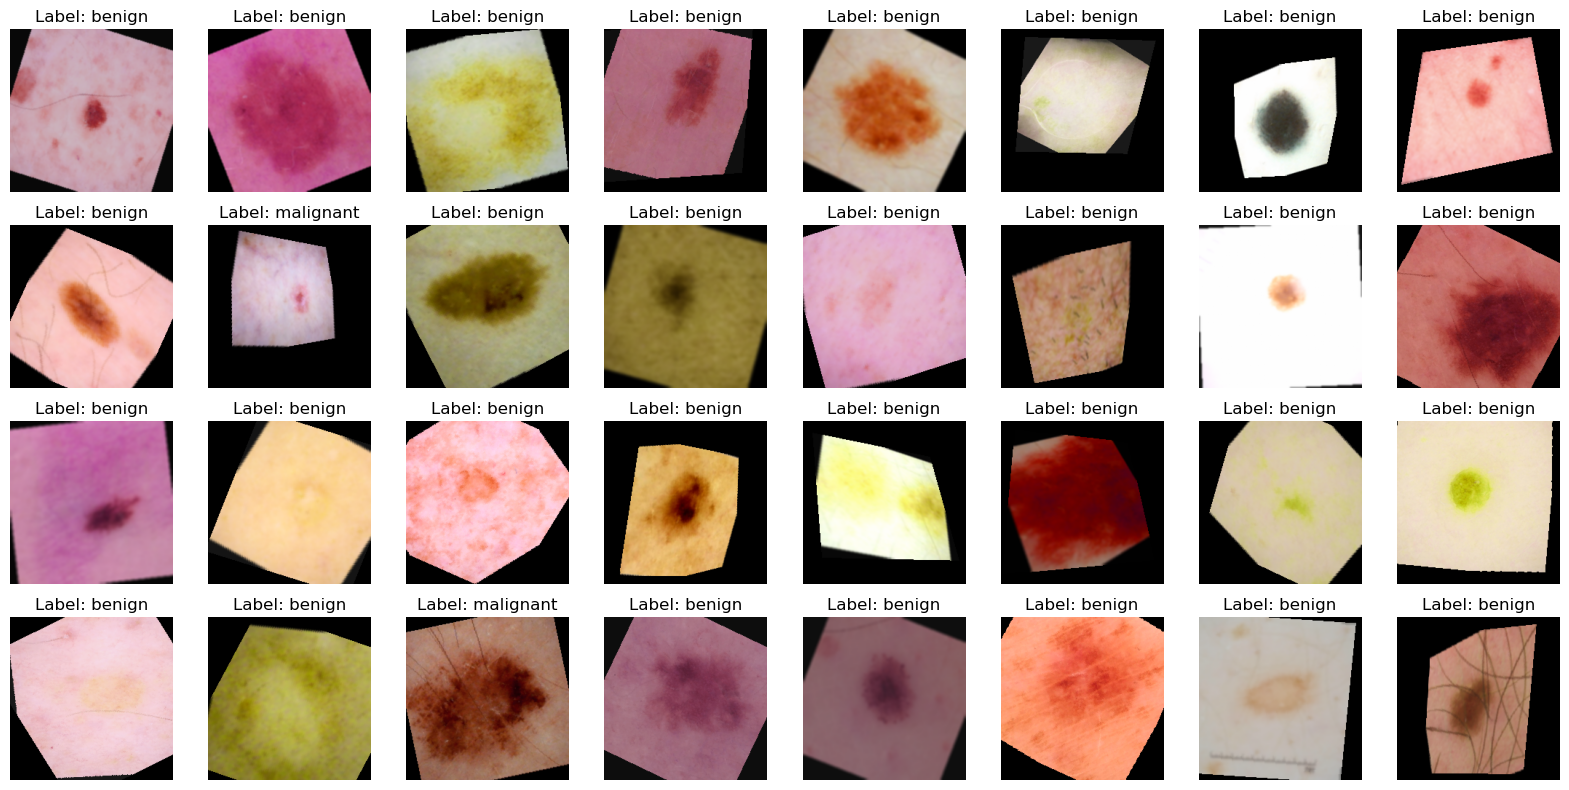

In [5]:
import torchvision.transforms as transforms
from PIL import Image
import torch
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0] # 3 is the index of image_path in train_data
        image = Image.open(img_name)

        age = self.dataframe.iloc[idx, 1] # 1 = index of age_approx in train_data
        anatom_site = self.dataframe.iloc[idx, 2] # 2 = index of anatom_site_encoded in train_data
        sex = self.dataframe.iloc[idx, 3]  # 3 = index of sexes_encoded in train_data
        label = self.dataframe.iloc[idx, 4]  # 4 = index of target in train_data

        # Apply transformations if available
        
        if self.transform:
            image = self.transform(image)
                     
        # Convert to tensor and return all inputs
        age = torch.tensor(age, dtype=torch.float32)
        anatom_site = torch.tensor(anatom_site, dtype=torch.float32)
        sex = torch.tensor(sex, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)
       
        return image, age, anatom_site, sex, label


train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.5),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=5)], p=0.5),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=7)], p=0.5),
    transforms.RandomApply([transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10)], p=0.5),
    transforms.RandomApply([transforms.RandomPerspective(distortion_scale=0.5)], p=0.5),
    transforms.ToTensor(),  
])

# Define transforms for the data (adjust as necessary)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
])

# Define dataset and dataloaders for train and test sets
train_dataset = CustomDataset(train_data, transform=train_transform)
valid_dataset = CustomDataset(valid_data, transform=test_transform)
test_dataset = CustomDataset(test_data, transform=test_transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,drop_last=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=True)

print('Data loading and preprocessing completed.')


# Get one batch
for batch in train_loader:
    images, ages, anatom_sites, sexs, labels = batch
    break

# Create a figure and a grid of subplots
fig, axs = plt.subplots(4, 8, figsize=(16, 8))

# Flatten the axs array so that we can iterate over subplots easily
axs = axs.flatten()
# Define class names
diagnosis_map = {0: 'benign', 1: 'malignant'}

# Plot each image
for i, ax in enumerate(axs):
    ax.imshow(images[i].permute(1, 2, 0).numpy())  # Convert tensor to numpy array and permute dimensions
    ax.axis('off')  # Turn off axis
    ax.set_title(f'Label: {diagnosis_map[int(labels[i])]}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout to make subplots fit
plt.show()

In [ ]:
# Define class names
diagnosis_map = {0: 'benign', 1: 'malignant'}
class_names = [diagnosis_map[i] for i in range(len(diagnosis_map))]

# Plot Confusion Matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

# Plot ROC Curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Add class names to the plot
    for i, txt in enumerate(class_names):
        plt.annotate(txt, (fpr[i], tpr[i]), textcoords="offset points", xytext=(5,5), ha='center')

    plt.show()

# Set model to evaluation mode
model.eval()

test_loss = 0.0
correct_test = 0
total_test = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for images, ages, anatom_sites, sexes, labels in tqdm(test_loader, desc="Test"):
        images, ages, anatom_sites, sexes, labels = images.to(device), ages.to(device), anatom_sites.to(device), sexes.to(device), labels.to(device)
        outputs = model(images, ages, anatom_sites, sexes)
        
        # Ensure the labels are float for binary cross-entropy loss
        labels = labels.float()
        
        loss = criterion(outputs.squeeze(), labels)  # Squeeze output and use float labels

        test_loss += loss.item()
        
        predicted = (outputs > 0).squeeze().long()  # Convert outputs to binary predictions
        all_predictions.extend(predicted.cpu().numpy())  # Save predictions
        all_labels.extend(labels.cpu().numpy())  # Save labels

        total_test += labels.size(0)
        correct_test += (predicted == labels.to(device)).sum().item()

# Calculate test metrics
test_loss /= len(test_loader)
test_accuracy = 100.0 * correct_test / total_test

conf_matrix = confusion_matrix(all_labels, all_predictions)
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

fpr, tpr, _ = roc_curve(all_labels, all_predictions)
roc_auc = auc(fpr, tpr)
roc_auc_score_val = roc_auc_score(all_labels, all_predictions)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%\n")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"ROC AUC Score: {roc_auc_score_val * 100:.2f}%\n")

plot_confusion_matrix(conf_matrix)
plot_roc_curve(fpr, tpr, roc_auc)

In [7]:
import os
from pytz import timezone
from datetime import datetime

def logdir(str):
    seoul_timezone = timezone('Asia/Seoul')
    today_seoul = datetime.now(seoul_timezone)
    
    directory_name = today_seoul.strftime("%Y-%m-%d-%H-%M")
    
    log_dir = str+directory_name
    
    if os.path.exists(log_dir):
        pass
    else:
        os.makedirs(log_dir)
        
    return log_dir
logdir('logs/')

'logs/2024-03-16-11-44'

In [10]:
!pip install torchsummary

In [1]:
from torchvision import models
from torchsummary import summary
import torch.nn as nn
import torch

backbone = models.vit_l_16(weights='ViT_L_16_Weights.IMAGENET1K_SWAG_E2E_V1')
# backbone_features = nn.Sequential(*list(backbone.children())[:-1])
# backbone_features
# summary(backbone, input_size=(3,224,224))
#dssadasdasdasd
backbone

Downloading: "https://download.pytorch.org/models/vit_l_16_swag-4f3808c9.pth" to /home/irteam/.cache/torch/hub/checkpoints/vit_l_16_swag-4f3808c9.pth
100%|██████████| 1.14G/1.14G [00:21<00:00, 56.2MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=1024, out_features=4096, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=4096, out_features=1024, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
       

In [ ]:
from model.mbc import MultiModalClassifier
from dataset.dataloader import getloader
import torch
from tqdm import tqdm
from torch.nn.parallel import DataParallel
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader, valid_loader = getloader('RawData/jpeg-melanoma-512x512/', batch_size=200, mode='train')
class MultiModalClassifierr(nn.Module):
    def __init__(self, num_classes, num_features, model_architecture, model_parameters):
        super(MultiModalClassifier, self).__init__()
        # Load pre-trained backbone model
        backbone_model = getattr(models, model_architecture)(**model_parameters)
        
        # Remove the last classifier layer
        self.backbone_features = nn.Sequential(*list(backbone_model.children())[:-1])
        
        # Define additional feature dimensions
        self.age_dim = 1  # assuming age is a single scalar value
        self.anatom_site_dim = 1  # assuming anatomical site is a single scalar value
        self.sex_dim = 1  # assuming sex is a single scalar value
        
        # Fully connected layers for classification
        self.fc1 = nn.Linear(num_features + self.age_dim + self.anatom_site_dim + self.sex_dim, 256)
        self.fc2 = nn.Linear(256, num_classes)
        
        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, image, age, anatom_site, sex):
        # Forward pass through the pre-trained EfficientNet model
        image_features = self.backbone_features(image)
        image_features = F.avg_pool2d(image_features, image_features.size()[2:]).view(image.size(0), -1)  # Flatten
        
        # Reshape age, anatom_site, and sex tensors
        age = age.view(-1, 1)  # Reshape to [batch_size, 1]
        anatom_site = anatom_site.view(-1, 1)  # Reshape to [batch_size, 1]
        sex = sex.view(-1, 1)  # Reshape to [batch_size, 1]
        # Concatenate image features with additional features
        additional_features = torch.cat((age, anatom_site, sex), dim=1)
        combined_features = torch.cat((image_features, additional_features), dim=1)
        
        # Fully connected layers for classification
        combined_features = F.relu(self.fc1(combined_features))
        combined_features = self.dropout(combined_features)
        output = self.fc2(combined_features) 
        
        return output
model = MultiModalClassifierr(1, 1536)
model = DataParallel(model, device_ids=[i for i in range(8)]).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

for images, ages, anatom_sites, sexes, labels in tqdm(train_loader, desc="Training"):
    optimizer.zero_grad()
    outputs = model(images.to(device), ages.to(device), anatom_sites.to(device), sexes.to(device))